https://docs.google.com/spreadsheets/d/1V8t4VyjcH2nXRPM5VFeffpkO-AnbC04YmdaI_PCZoBw/edit?gid=1687723188#gid=1687723188

Load_data

In [ ]:
import pandas as pd

sheet_name = 'cleaned_รายวิชา_สหวิทยาการ'
sheet_id = "1V8t4VyjcH2nXRPM5VFeffpkO-AnbC04YmdaI_PCZoBw"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

import requests
response = requests.get(url)


In [ ]:

# Decode the content using utf-8
decoded_content = response.content.decode('utf-8')

# Use StringIO to create a file-like object from the decoded content
from io import StringIO
data = pd.read_csv(StringIO(decoded_content))
data.head()
data.columns

Index(['course code', 'course description', 'outline', 'learning outcome',
       'Unnamed: 4'],
      dtype='object')

Clean_EDA_

In [ ]:
data.drop(columns=['Unnamed: 4'], inplace=True)

In [ ]:
print(data.isnull().sum())
data.dropna(inplace=True,how='all')
data2 = data.dropna(subset=['course description'])
# print(data2.isnull().sum())


course code           0
course description    0
outline               0
learning outcome      0
dtype: int64


In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 2.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
data.head()

,course code,course description,outline,learning outcome
0,DSI203,"Actor analysis, goal analysis, causal analysis...",Review of Probability and Statistical Distribu...,Able to systematically analyze problems\nProfi...
1,DSI206,"""Multimedia management technologies to handle ...",Image Formation & Image Compression\r\nGeometr...,Risk Assessment\nPitching and persuasion\nSoci...
2,DX312,Key principles of financial accounting. Analys...,1. Overview Accounting and Finance Definitions...,The learners understand the principles of fina...
3,DX313,"""Fundamental of Laws on Business and Informati...",1 Course Syllabus and Overview\r\n2 Review of ...,Possesses foundational knowledge in jurisprude...
4,TU109,"""Risk assessment and creating new opportunitie...",Course introduction/Entrepreneurial mindset\nB...,Ability to assess risks and create new opportu...


In [ ]:
!pip install transformers torch

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
model = SentenceTransformer('multi-qa-mpnet-base-cos-v1')

descriptions_list = data['outline'].tolist()
# print(descriptions_list)
# print(len(descriptions_list))



embeddings = model.encode(descriptions_list)
# print(embeddings)
# print(embeddings.shape)



columns = []
for i in range(embeddings.shape[1]):  # ชื่อ 768 columns
    columns.append(f'feature_{i}')
df_embeddings = pd.DataFrame(embeddings, columns=columns)


K = 9
model = KMeans(n_clusters=K , random_state=42)
model.fit(df_embeddings)



data["cluster"] = model.labels_
print(data[["course code" , "cluster"]])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.25k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   course code  cluster
0       DSI203        7
1       DSI206        4
2        DX312        6
3        DX313        0
4        TU109        5
5        TU131        1
6       DSI207        3
7        DX310        5
8        DX311        8
9        DX314        8
10       FD217        8
11       FN281        6
12      DSI310        2
13      DSI311        3
14      DSI312        0
15      DSI313        8
16      DSI314        5
17      DSI320        0
18      DSI321        3
19      DSI322        2
20      DSI323        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


model_clutering_groups

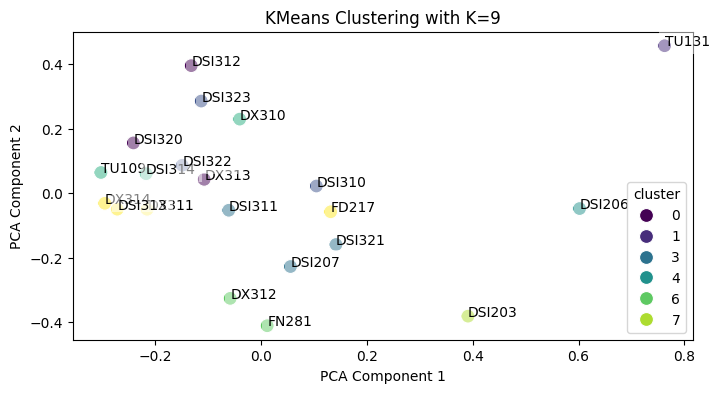

In [ ]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(df_embeddings)
data['pca1'] = reduced_embeddings[:, 0]
data['pca2'] = reduced_embeddings[:, 1]

plt.figure(figsize=(8, 4))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='viridis', s=100)

for i in range(len(data)):
    plt.text(x=data['pca1'].iloc[i], y=data['pca2'].iloc[i],
             s=data['course code'].iloc[i],
             fontdict=dict(color='black', size=10),
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.title(f'KMeans Clustering with K={K}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', None)
print(data[data["course code"] == "DSI320"][["outline"]])


                                                                                                                                                                                                                                                                                                                                                                                                                                outline
17  Course Syllabus and Introduction to Data Architecture\nData Governance and Data Integration\nE-R Diagram and Data Model\nETL and Data Pipeline\nImplementation and Practice\nImplementation and Practice\nIntroduction to Azure Cloud Platform\nLinux Command and Container\nMS Azure Platform \nMS Azure Platform \nGoogle Cloud Platform \nDistributed Database \nProject Presentation \nProject Presentation\nSummary and Review


In [ ]:
pd.set_option('display.max_colwidth', None)
print(data[data["course code"] == "DSI323"][["outline"]])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     outline
20  Course outline Recap to Big Data Analytics Data Governance and Data Management \nData Management- Overview 9 components \nData Modeling and Design Data Storage and Operations \nData Security Data Integration and Interoperability \nData Warehousing and Business Intelligence \nData Quality \nReview \nDocument and Content Management Reference and Master Data \nMetadata Management \nCKAN-tutorial1 \nCKAN-tutorial2 \nCKAN-Workshop \nData Governance in Real Sector \nReview 


Another model
